# Project: Investigate a Dataset - [Medical Appointment No Shows Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Some works to do

- Load the first dataset
- Use request package to get the content of the second dataset
- Request the third dataset from twitter API
- Combine the three dataset and 
- Remove rows with denominator greater than 10
- Remove roes with numerator higher than 15
- Under the age group columns (flooper, doggo, etc.) Replace "None" and "Nan" with empty space "".
- Check for rows which has values of more than one with respect to the age groups and remove such rows since it will be confsing for a dog to belong to more than one age group at the same time.
- Then create a new column called "ageGroup" and combine all the flooper, doggo etc., columns into it. Then remove the individual columns of flooper, doggo, ect.
- Remove all columns with zero rows or very low number of rows if they are not very important to the objectives of our project.
- Convert tweet_id to object instead of int64 data-type
- Convert timestamps to datetime data type instaed of object.
- Check for and assessed at least 8 Quality issues and 2 Tidiness issues
- 

# <a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The original dataset can be <a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments"> **found here** </a>

<ul>
    <li>'PatientId' indicates the ID attributed to each patient. </li>
    <li>'AppointmentId' indicates the ID attributed to each appointment. </li>
    <li>'Gender' is the gender of each patient.</li>
    <li>'ScheduledDate' tells us on what day the patient set up their appointment.</li>
    <li>'AppointmentDay' indicates which date of the week the patient appointment falls on. </li>
    <li>'Age' indicates the age of each patient. </li>
    <li>'Neighborhood’ indicates the location of the hospital.</li>
    <li>'Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program 'Bolsa Família'. </li>
    <li>'Hypertension’ indicates whether or not the patient has hypertension. </li>
    <li>'Diabetes’ indicates whether or not the patient has diabetes. </li>
    <li>'Alcoholism’ indicates whether or not the patient is diagniosed with alcoholism. </li>
    <li>'Handcap’ indicates whether or not the patient is handicapped. </li>
    <li>'SMS_received’ indicates whether or not the patient received an SMS. </li>
    <li>'No-show' indicates whether the patient show up for appointments or not.</li>
    
    
</ul>

### Questions for Analysis
1. Is there a relationship between patients not showing up and been on scholarship?
2. Is there a relationship between patients not showing up and been hypertensive?
3. Is there a the relationship between receiving SMS and not showing up?
4. Is there a relationship between Gender not showing up for an appointment?
5. Is there a relationshp between patients been of an Age group and not showing up?
6. What Age Group is most of the patients?

### Import Needed packages

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline
plt.show()

<a id='wrangling'></a>
## Data Wrangling


### Assessing Data
- Load data
- Check the loaded data to do visual assessment
- Check for columns with empty and null entries and fill in the data where necessary.
- Check for entries with wrong or mismatched datatypes
- Check statistic summary of the data

In [2]:
# Load dataset
df = pd.read_csv('noshow_appointments.csv')


# Print out few lines to do visual assessment
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check the number of rows and colums
df.shape

(110527, 14)

#### Observation:
> The dataset has 110527 rows and 14 columns

In [4]:
# Inspect Data types and check for missing data and empty entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check for null values/entries
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Observations
> There's no missing entry/value

In [6]:
# Check for duplicated rows
df.duplicated().sum()

0

#### Observations
> There's no duplicated row

In [7]:
# Check the datatypes of each columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### Getting Statitsics Summary Of Numerical/Quantitative Data
> After careful observation, we can only get the 'Age' as the quantitative data in our dataset, others are categorical data

In [8]:
# Getting the statitsical summary of 'Age'
df['Age'].describe().astype('int64')

count    110527
mean         37
std          23
min          -1
25%          18
50%          37
75%          55
max         115
Name: Age, dtype: int64

### Observations
> The minimum Age value is '-1' which is absurd since Age should not be negative

In [9]:
# Getting'Age' value that are zero '0'
AgeNegative = df.query('Age < 0').count()
AgeNegative

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

### Observations
> There's only 1 patient with a negative age

In [10]:
# Getting'Age' value that are zero '0'
AgeZero = df.query('Age == 0').count()
AgeZero

PatientId         3539
AppointmentID     3539
Gender            3539
ScheduledDay      3539
AppointmentDay    3539
Age               3539
Neighbourhood     3539
Scholarship       3539
Hipertension      3539
Diabetes          3539
Alcoholism        3539
Handcap           3539
SMS_received      3539
No-show           3539
dtype: int64

#### Observations
> There are 3539 patients with Age "0"

In [11]:
# Getting'Age' value that are zero '0'
AgeNormal = df.query('Age > 0').count()
AgeNormal

PatientId         106987
AppointmentID     106987
Gender            106987
ScheduledDay      106987
AppointmentDay    106987
Age               106987
Neighbourhood     106987
Scholarship       106987
Hipertension      106987
Diabetes          106987
Alcoholism        106987
Handcap           106987
SMS_received      106987
No-show           106987
dtype: int64

#### Observations
> There are 106987 patients with Age a normal age "Age greater than 0"

### Findings From Data Assessment

- The dataset has 110527 rows and 14 columns
- Since all columns have 110527 non-null entries each, this shows that there's no missing entry
- Some columns name have ununiformed naming conventions different from how other columns are named.
- The PatientId columns is supposed to be an proper integers but not presently, it needs to be converted to proper figures.
- The entries in the ScheduledDay and AppointmentDay columns comes with extra data (Time) which we won't need for this analysis, since we only care about the date of the schedules were made and and the date of the appointments.
- It was observed that Age i negative value and some zero values which need to be dropped.


### Data Cleaning

- Drop columns which are not involved or necessary for our analysis so as to have a more compact dataset.
- Rename columns names which does not not follow the naming convention of the rest of the columns in the data set.
- Remove the extra time info on each ScheduleDay entries.
- Remove the extra time info on each AppointmentDay entries.
- Drop the Age rows with Zero and negative values.
- Replace '0' with 'No' and '1' with 'Yes' in the Scholarship and SmsReceived Columns.
- Replace 'M' with 'Male' and 'F' with 'Female' in the Gender column.
- Create a column for AgeGroup so as to determine which age group showed up or not for the appointments more than the others.
- Save a copy of the cleaned data so as to keep a copy of the original data intact.

> ### Drop columns which are not involved or necessary for our analysis so as to have a more compact dataset.

In [12]:
df.drop(columns=['PatientId', 'AppointmentID', 'Alcoholism', 'Diabetes', 'Handcap'], inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,0,No


> ###  Rename columns names which does not not follow the naming convention of the rest of the columns in the data set.

In [13]:
# Rename the 'SMS_received' and 'No-show' column titles
df.rename(columns={'Hipertension' : 'Hypertension', 'SMS_received':'SmsReceived', 'No-show':'NoShow'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,SmsReceived,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,0,No


> ### Remove the extra time info on each ScheduleDay entries.

In [14]:
# Convert the ScheduledDay and AppointmentDay values to date types so as to remove the unwanted Time values
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date

# Confirm Operation
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,SmsReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,0,No


> ### Drop the Age rows with Zero and negative values.


In [15]:
df.drop(df.query('Age <= 0').index, inplace=True)

In [16]:
# Confirm the operation
df['Age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

> ### Replace '0' with 'No' and '1' with 'Yes' in the Scholarship, Handiacap and SmsReceived Columns.

In [17]:
# Changing '0' for 'No' and '1' for 'Yes'
df['Scholarship'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['SmsReceived'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['Hypertension'].replace([0, 1], ['No', 'Yes'], inplace=True)

# Confirm Operation
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,SmsReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,No,No


> ### Replace 'M' with 'Male' and 'F' with 'Female' in the Gender column.

In [18]:
# Replace 'M' with 'Male' and 'F' with 'Female'
df['Gender'].replace(['F','M'], ['Female','Male'], inplace=True)

# Confirm Operation
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,SmsReceived,NoShow
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,No,No


> ### Create a column for AgeGroup so as to determine which age group showed up or not for the appointments more than the others.

> Since Age is the only numerical data we have on this dataset and all other variables are categorical data, it's better to create categories for Age as well so as to be able to find the relationship between Age and other data/variables easily as categorical data.

> Let's create a new column for AgeGroup with categories of:
- Children: 1 - 14 years
- Youth:  15 - 24 years
- Adult: 25 - 64 years
- Senior: 65 years and above

In [19]:
# To create a new column for the AgeGroup and its categories
df["AgeGroup"] = df["Age"].apply(lambda x: "Children" if x <= 14 else "Youth" if x <=24 else "Adult" if x <=64 else "Senior" )

# Confirm operation
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,SmsReceived,NoShow,AgeGroup
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,Adult
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,Adult
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,Adult
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,Children
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,No,No,Adult


> ### Save a copy of the cleaned data so as to keep a copy of the original data intact.

In [20]:
#Save a copy of the cleaned data to have the original dataset unaltered.
df.to_csv('noshow_appointment_cleaned.csv', index=False)

In [21]:
# Import the saved cleaned dataset
df = pd.read_csv('noshow_appointment_cleaned.csv')

# Preview the dataset to confirm
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,SmsReceived,NoShow,AgeGroup
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,Adult
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,Adult
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,Adult
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,Children
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,No,No,Adult


<a id='eda'></a>
## Exploratory Data Analysis

> We will be addressing the research questions in this section

> ### Please Note:

> Since our all the variables we will be working with on this dataset are categorical data, we need a way to establish whether there is a relationship between them and the dependent variable (NoShow) which will let us know whether they (the dependent variables; Age, Handicap, Neighborhood, Scholarhsip, SmsReceived, etc.) could serve as important factors to predict if a patient will show up for their scheduled appointment?

> To find the relationship between these dependent variables (factors) and "NoShow" (showing up for appointment), we will be employing the Pearson’s Chi-Square statistical hypothesis. This is used to test for independence between categorical variables. Doing this, a crosstab called contingency table will be used to summarize the relationship between the categorical variables.

> - Null hypothesis (H0): This means there is no statistically significant relationship between the two categorical variables
> - Alternative hypothesis (Ha): This means there is a statistically significant relationship between the two categorical variables
> - Decision Rule: Reject null hypothesis (H0), if p-value (0.05) < α. Otherwise, do not reject H0

### Some Useful Chi-Square Functions

In [22]:
# This is a Function to create a contigency table between the datset features and NoShow
def chisqr(df,var):
    return pd.crosstab(df[var], df["NoShow"], margins = False)

In [23]:
# This is a Function to create bar chart for the contigency table between the datset factors and NoShow
def barplot(df, var):
    (pd.crosstab(df[var], df["NoShow"], margins = False)).plot(kind = "bar", figsize = (20,5))
    plt.ylabel(f"NoShow {var}")
    plt.title(f"Distribution of {var} VS NoShow".title(), fontsize = 15, weight='bold')

In [24]:
#This Function is to run a chi-square test for independence
def chitest(df, var):
    pd.crosstab(df[var], df["NoShow"], margins = False)
    print ('p-value:', chi2_contingency( pd.crosstab(df[var], df["NoShow"], margins = False))[1].round(5))

### Researh Question 1: Is there a relationship between patients not showing up and been on scholarship?

#### Step1: Get the contingency table

In [25]:
# Let's create a contigency table between Scholarship and NoShow
ScholarshipConTable = chisqr(df,"Scholarship")
ScholarshipConTable

NoShow,No,Yes
Scholarship,,
No,77069,19109
Yes,8238,2571


#### Step 2: Get the Dsitribution using a Bar chart

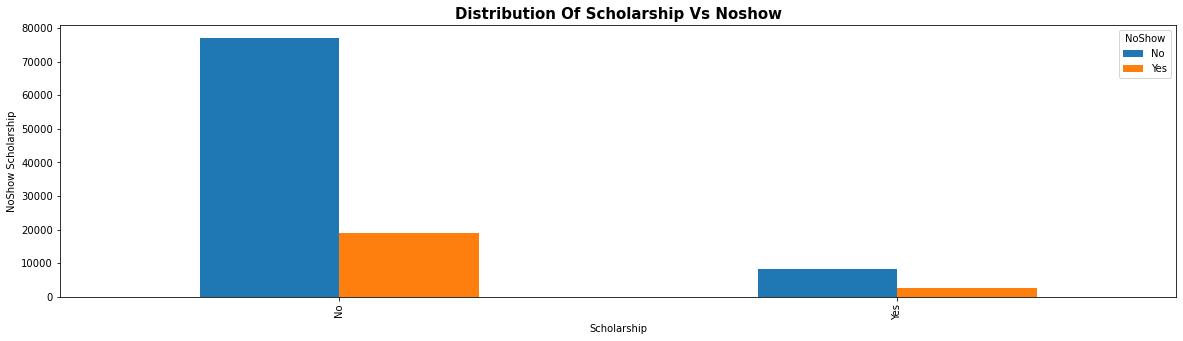

In [26]:
# To get the Distribution of Scholarship VS NoShow 
ScholarshipBar = barplot(df,"Scholarship")

#### Step 3: Get the p-value to make decision

In [27]:
# Run a chi-square test for independence
ScholarshipPvalue = chitest(df,"Scholarship")

p-value: 0.0


#### Decision
Since p-value (0.0) is less than  𝛼=0.05 , we reject  𝐻0 .

#### Conclusion
We say, there is a significant relationship between been on Scholarship and showing up for appointments by patients.

### Researh Question 2: Is there a relationship between patients not showing up and been hypertensive?

#### Step1: Get the contingency table

In [28]:
# Let's create a contigency table between Hypertension and NoShow
HypertensionConTable = chisqr(df,"Hypertension")
HypertensionConTable

NoShow,No,Yes
Hypertension,,
No,67278,17908
Yes,18029,3772


#### Step 2: Get the Dsitribution using a Bar chart

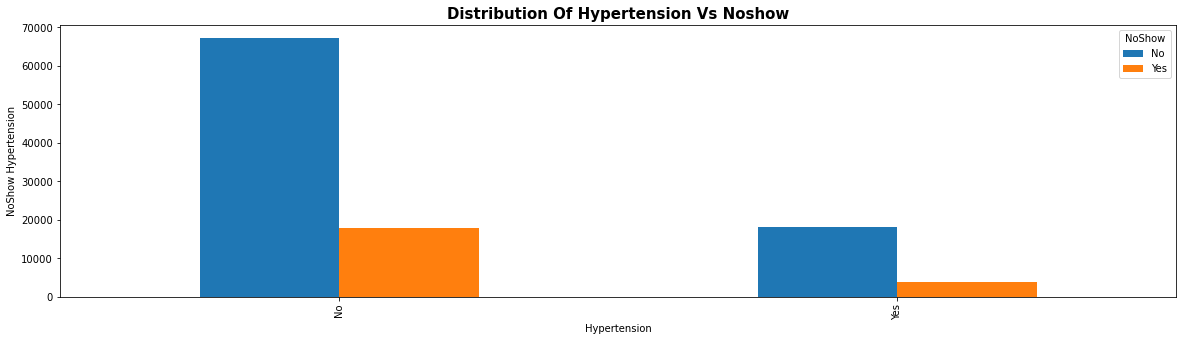

In [29]:
# To get the Distribution of Hypertension VS NoShow 
HypertensionBar = barplot(df,"Hypertension")

#### Step 3: Get the p-value to make decision

In [30]:
# Run a chi-square test for independence
HypertensionPvalue = chitest(df,"Hypertension")

p-value: 0.0


#### Decision
Since p-value (0.0) is less than  𝛼=0.05 , we reject  𝐻0 .

#### Conclusion
We say, there is a significant relationship between been on Hypertension and showing up for appointments by patients.

### Researh Question 3: Is there a the relationship between receiving SMS and not showing up?

#### Step1: Get the contingency table for Gender

In [31]:
# Let's create a contigency table between Gender and NoShow
SmsReceivedConTable = chisqr(df,"SmsReceived")
SmsReceivedConTable

NoShow,No,Yes
SmsReceived,,
No,60290,12112
Yes,25017,9568


#### Step 2: Get the Dsitribution using a Bar chart

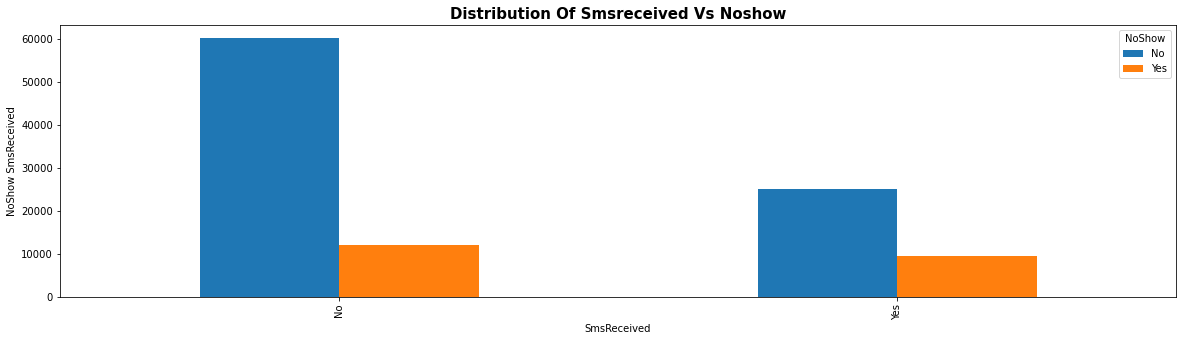

In [32]:
# To get the Distribution of SmsReceived VS NoShow 
SmsReceivedBar = barplot(df,"SmsReceived")

#### Step 3: Get the p-value to make decision

In [33]:
# Run a chi-square test for independence
SmsReceivedPvalue = chitest(df,"SmsReceived")

p-value: 0.0


#### Decision
Since p-value (0.0) is less than  𝛼=0.05 , we reject  𝐻0 .

#### Conclusion
We say, there is a significant relationship between SmsReceived and showing up for appointments by patients.

### Researh Question 4: Is there a relationship between Gender and not showing up for an appointment?

#### Step1: Get the contingency table for Gender

In [34]:
# Let's create a contigency table between Hypertension and NoShow
GenderConTable = chisqr(df,"Gender")
GenderConTable

NoShow,No,Yes
Gender,,
Female,55843,14275
Male,29464,7405


#### Step 2: Get the Dsitribution using a Bar chart

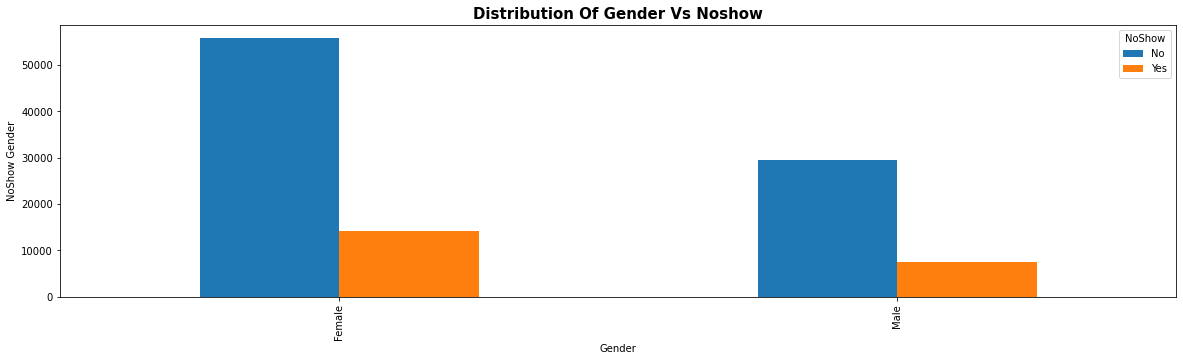

In [35]:
# To get the Distribution of Gender VS NoShow 
GenderBar = barplot(df,"Gender")

#### Step 3: Get the p-value to make decision

In [36]:
# Run a chi-square test for independence
GenderPvalue = chitest(df,"Gender")

p-value: 0.29314


#### Decision
Since p-value (0.0) is greater than  𝛼=0.05 , we accept  𝐻0.

#### Conclusion
We say, there is no significant relationship between Gender and showing up for appointments by patients.

### Researh Question 5: Is there a relationship between AgeGroup and not showing up for an appointment?

#### Step1: Get the contingency table for Gender

In [37]:
# Let's create a contigency table between AgeGroup and NoShow
AgeGroupConTable = chisqr(df,"AgeGroup")
AgeGroupConTable

NoShow,No,Yes
AgeGroup,,
Adult,47237,11620
Children,15431,4287
Senior,12169,2233
Youth,10470,3540


#### Step 2: Get the Dsitribution using a Bar chart

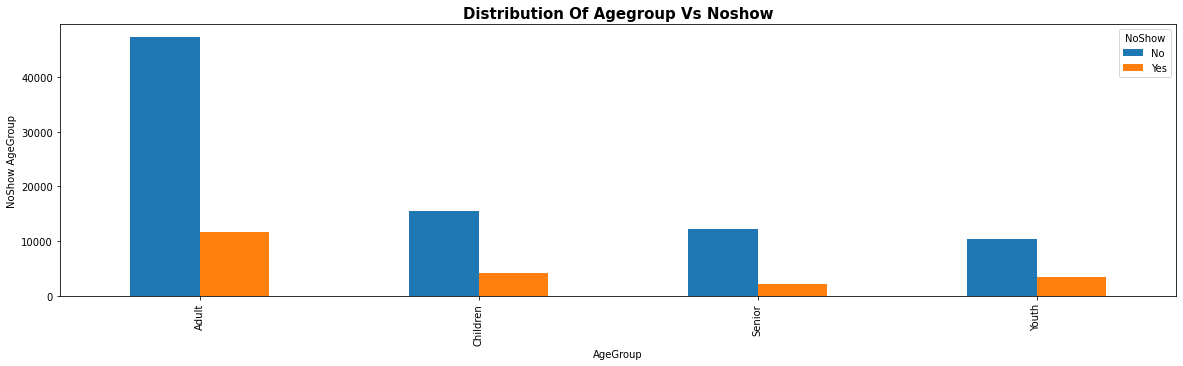

In [38]:
# To get the Distribution of AgeGroup VS NoShow 
AgeGroupBar = barplot(df,"AgeGroup")

#### Step 3: Get the p-value to make decision

In [39]:
# Run a chi-square test for independence
AgeGroupPvalue = chitest(df,"AgeGroup")

p-value: 0.0


#### Decision
Since p-value (0.0) is less than  𝛼=0.05 , we reject  𝐻0.

#### Conclusion
We say, there is significant relationship between AgeGroup and showing up for appointments by patients.

### Researh Question 6: What Age Group is most of the patients?
> This would provide us an insight to know the age group which majority of the patients falls into.

In [40]:
# Getting statistics summary of AgeGroup Data
df['AgeGroup'].describe()

count     106987
unique         4
top        Adult
freq       58857
Name: AgeGroup, dtype: object

> #### Observation
> It's observed that majority of the patients are Adult, as groups ealier, these are people between the age of 25 and 64 years.

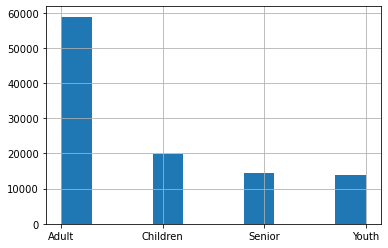

In [41]:
# Getting a visual knoweledge of the Age Group Distribution
df.AgeGroup.hist();


> #### Conclusion
> The histogram also confirmed that most of the patients are Adult, as groups ealier, these are people between the age of 25 and 64 years.

## Conclusions

> The analysis of the dataset "Medical Appoitments No Shows" investiages some factors that influence whether patients will show up for appointments or not. This analysis investigates factors like Gender, AgeGroup, Scholarship, Hypertension, SmsReceived and their relationships with patients showing up for appointment. Analysis shows that factors like Age group, SMS recieved, Hypertension, and Scholarship have significant relationship with patients showing for appoitments. It also shows that factor like Gender has no significant relationship with patients showing up for appointments.

> Analysis to determine the relationship between some factors and showing up for appointment was done using the Pearson’s Chi-Square Statistical Hypothesis method. It's important to mention that no other statistical method was used for this analysis. 

> For the analysis, the investigation did not consider factors like Handicap, Alcoholism, and Diabetes on how they influence if patients show up for appoitments. 

> In conclusion, there are only four (4) factors that influence if patients will show up for appointments or not out of the five (5) factors investigated. Also, the number of patients that attended medical appointments is greater than the number of patients that didn't show up for medical apppointment.


#### Limitations

- Most of the factors/variables in the dataset are categorical data type (variables).
- The first limitation raised above made it difficult to perform a strong correleation or a quantitative analysis on the dataset, hence such could not be performed.
- Cleaning the data so as to perform adequate analysis made it required to delete some rows with unexpected values, like a negative value for age; hence, not all rows of the data could be worked upon for the analysis.


**Below are the website and tools that were used that aided in the investigation of the dataset**

- <a href="https://www.pandas.pydata.org/"> pandas </a>
- <a href="https://www.matplotlib.org/"> matplotlib </a>
- <a href="https://www.seaborn.pydata.org/"> seaborn </a>

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255